In [1]:
import pyNab as Nab
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fileDirectory = 'F:\\LANL Data\\'
filenames = []
#preamp H
filenames.append('ScopeRun368_3.scope')
filenames.append('ScopeRun368_5.scope')
filenames.append('ScopeRun368_9.scope')
filenames.append('ScopeRun368_11.scope')
#preamp M
filenames.append('ScopeRun369_6.scope')
filenames.append('ScopeRun370_2.scope')
#preamp D
filenames.append('ScopeRun372_8.scope')
#preamp E
filenames.append('ScopeRun374_2.scope')
#preamp F
filenames.append('ScopeRun376_2.scope')
#preamp G
filenames.append('ScopeRun377_2.scope')
filenames.append('ScopeRun377_4.scope')
filenames.append('ScopeRun377_6.scope')
#preamp I
filenames.append('ScopeRun377_10.scope')
filenames.append('ScopeRun377_14.scope')
filenames.append('ScopeRun377_19.scope')
#preamp J
filenames.append('ScopeRun378_2.scope')
#preamp K
filenames.append('ScopeRun379_2.scope')
filenames.append('ScopeRun379_6.scope')
#preamp L
filenames.append('ScopeRun379_10.scope')
filenames.append('ScopeRun379_14.scope')
#preamp O
filenames.append('ScopeRun380_2.scope')
filenames.append('ScopeRun380_6.scope')
#preamps P and Q
filenames.append('ScopeRun380_15.scope')
filenames.append('ScopeRun380_19.scope')
#preamps R, S, T and U
filenames.append('ScopeRun380_23.scope')
files = []
for file in filenames:
	files.append(fileDirectory+file)

In [3]:
waveforms = Nab.wf.waveformFile(files)

In [4]:
results = waveforms.determineEnergyTiming('trap', params=[1250, 40, 1250], batchsize=10000)

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [02:56<00:00,  5.52s/it]


In [7]:
print(results.numWaves)

324123


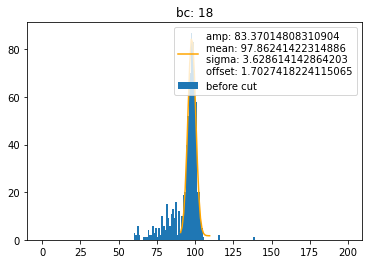

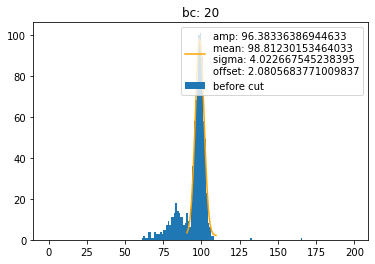

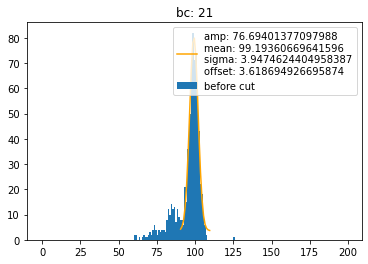

C:\Users\divad\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


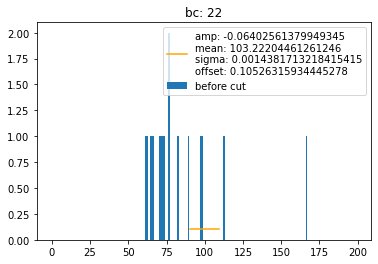

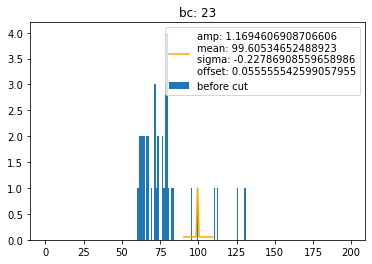

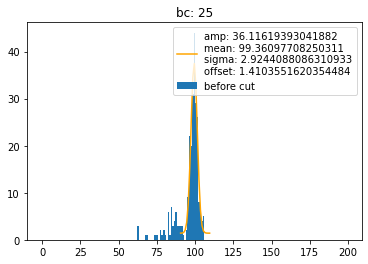

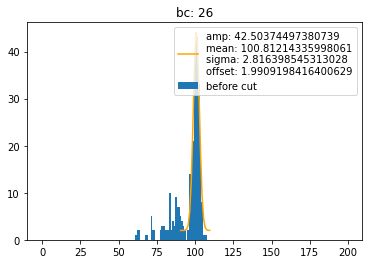

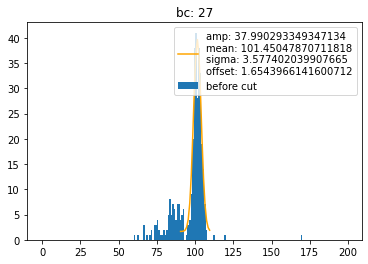

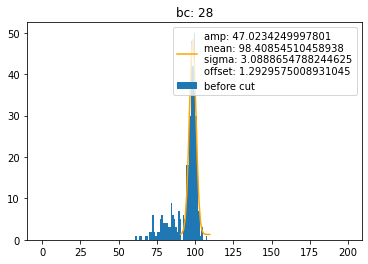

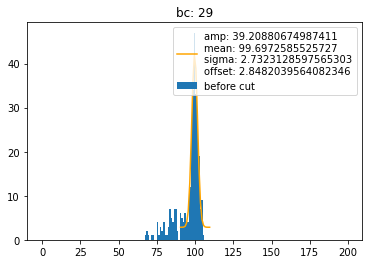

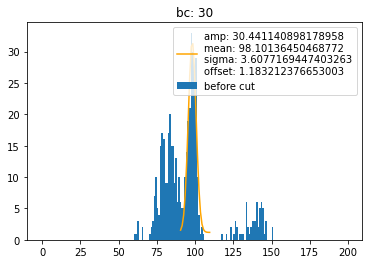

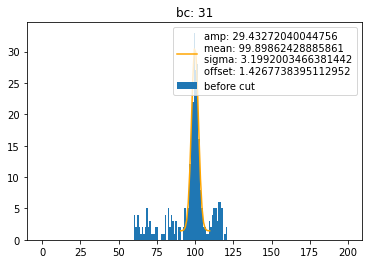

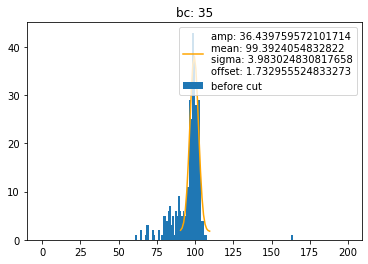

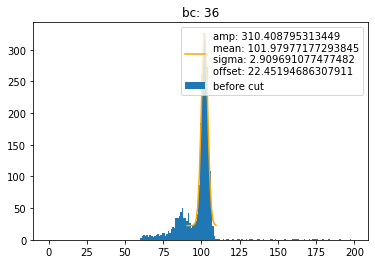

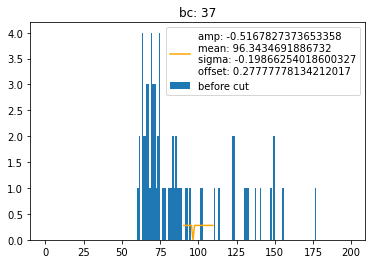

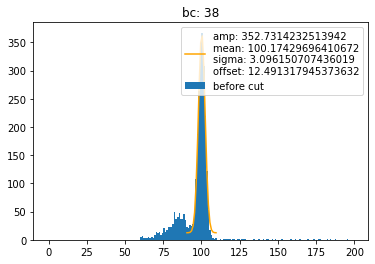

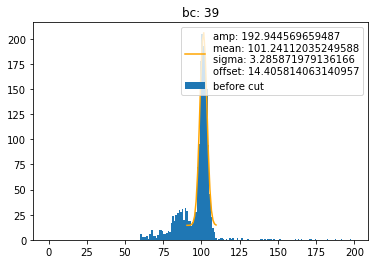

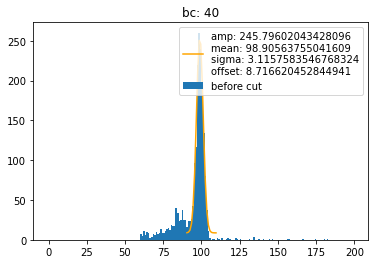

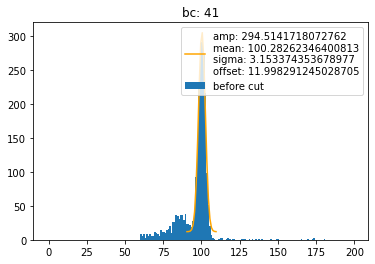

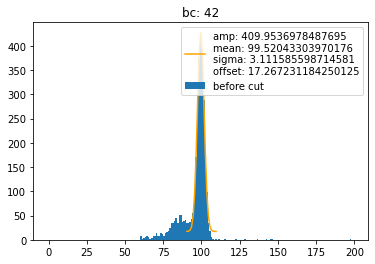

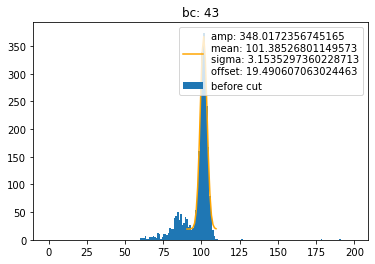

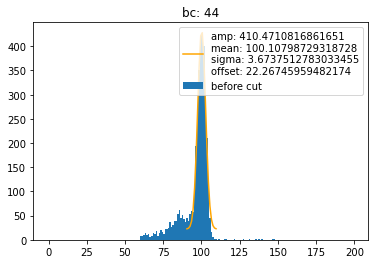

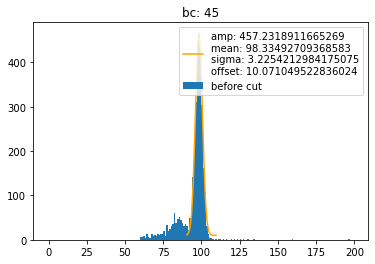

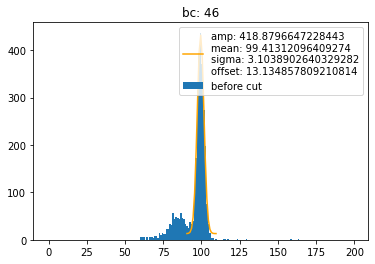

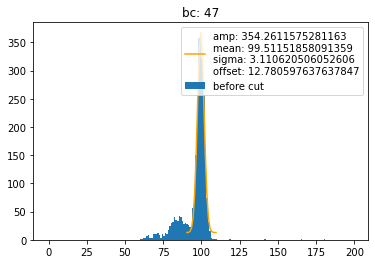

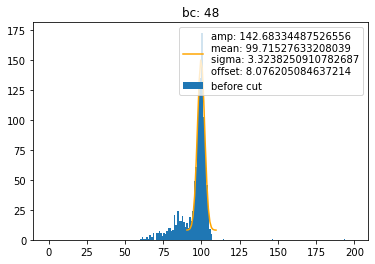

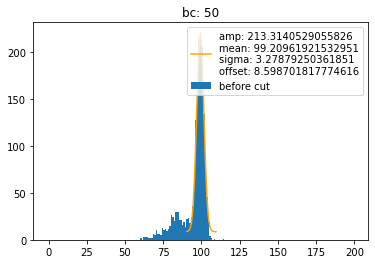

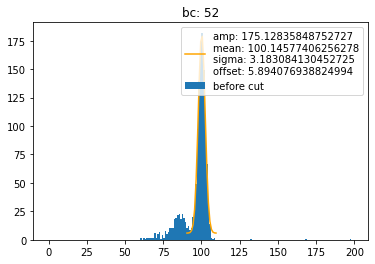

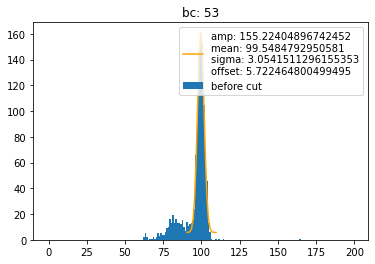

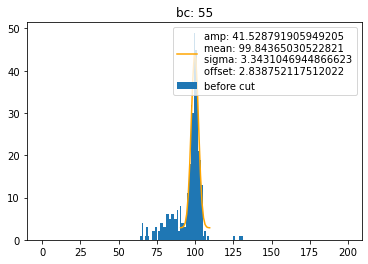

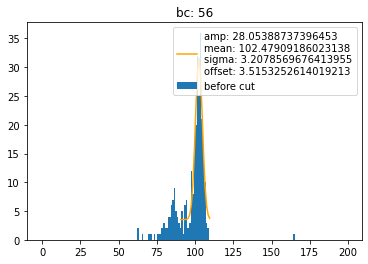

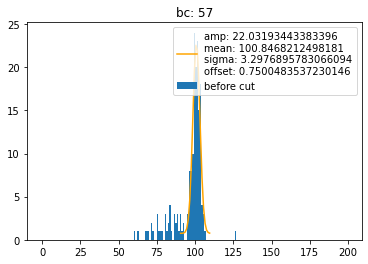

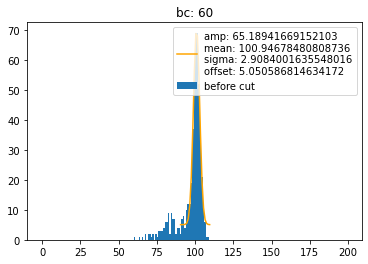

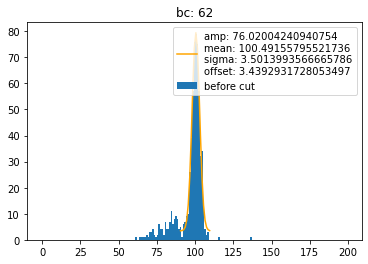

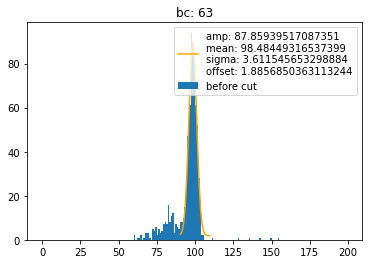

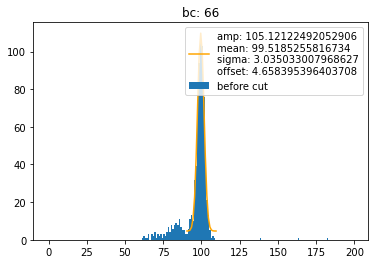

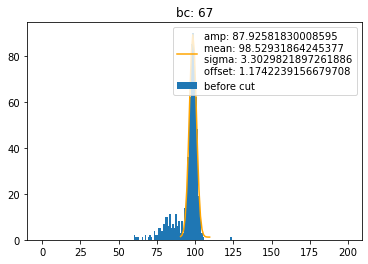

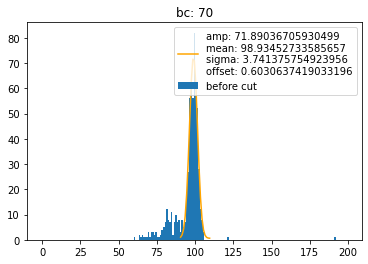

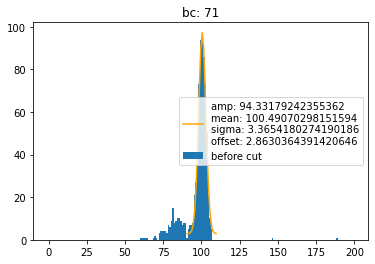

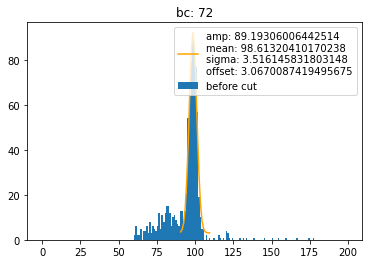

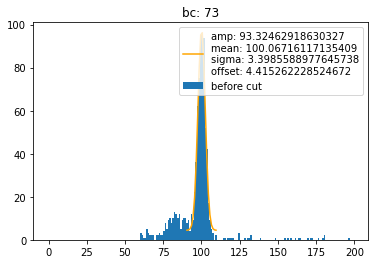

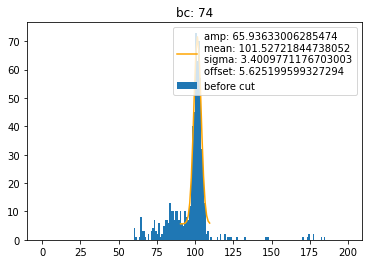

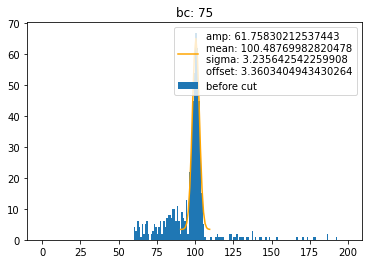

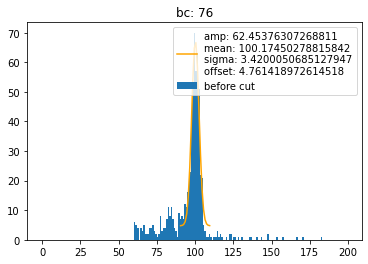

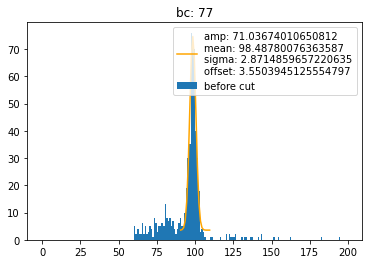

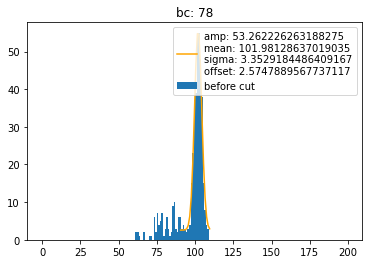

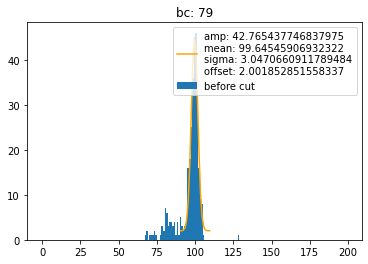

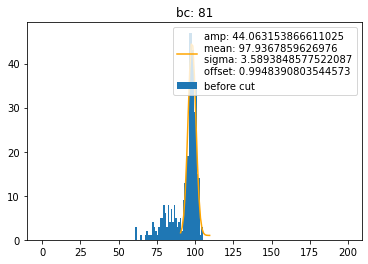

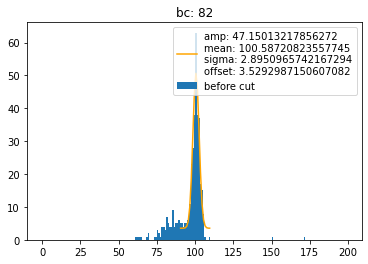

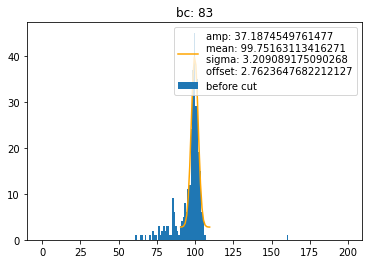

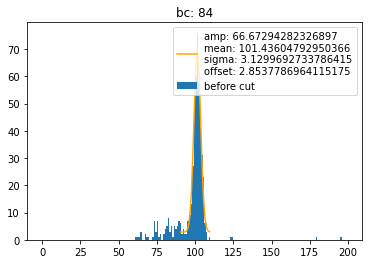

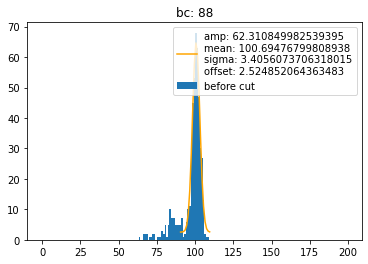

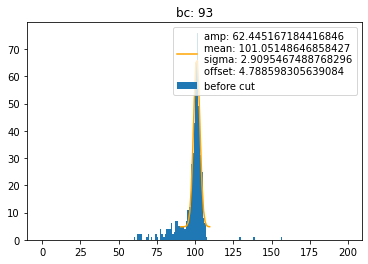

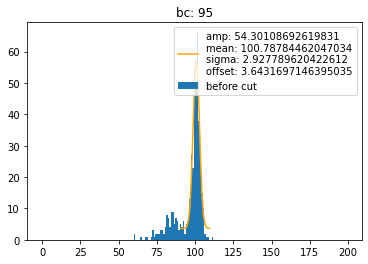

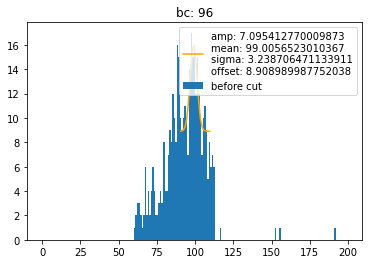

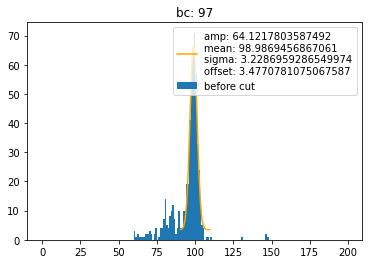

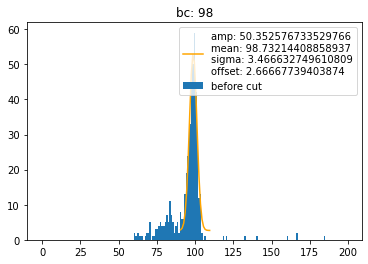

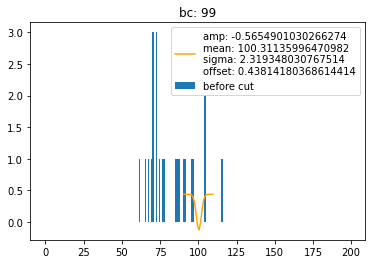

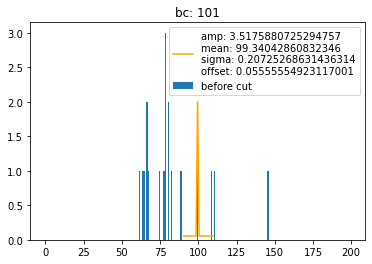

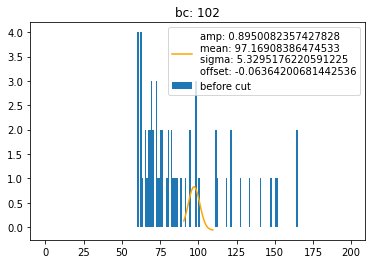

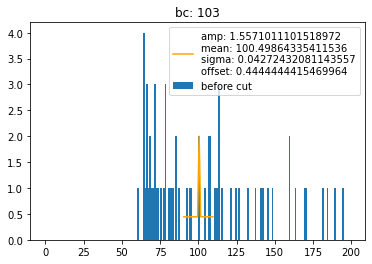

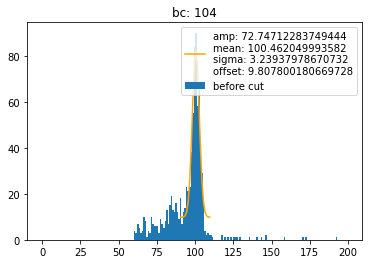

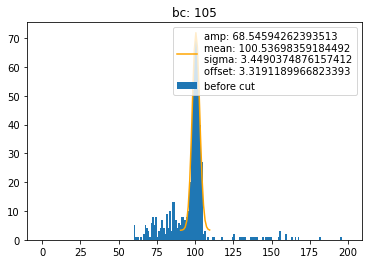

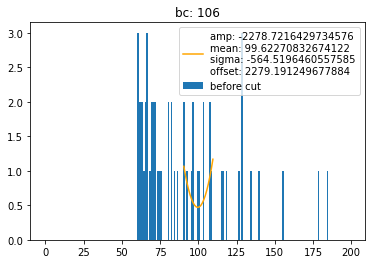

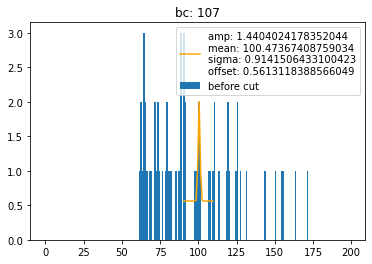

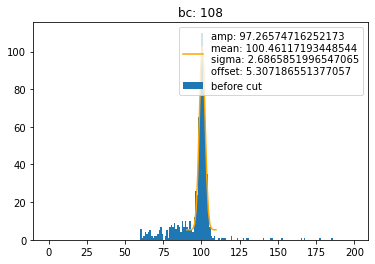

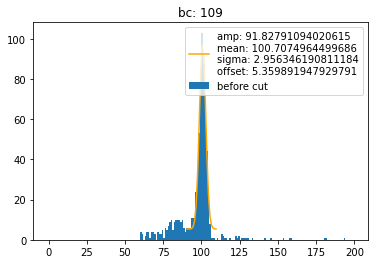

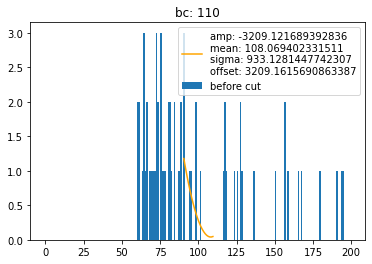

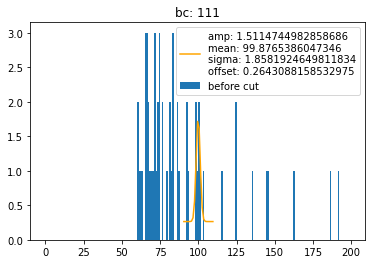

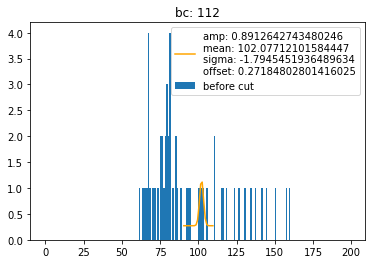

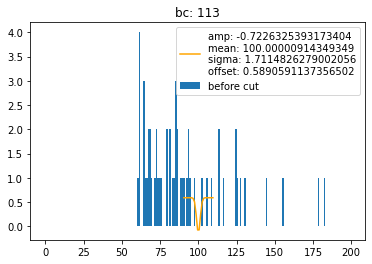

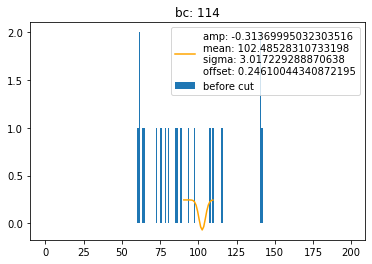

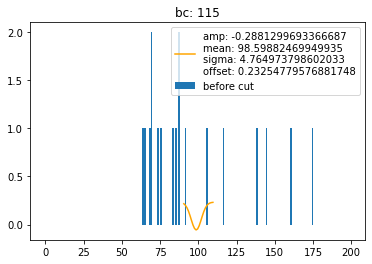

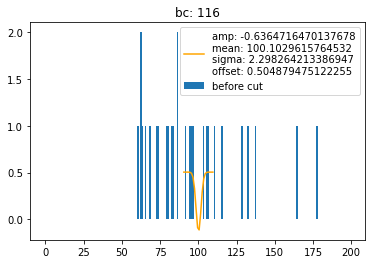

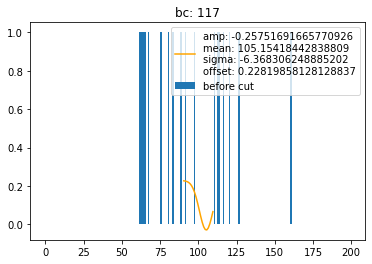

C:\Users\divad\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


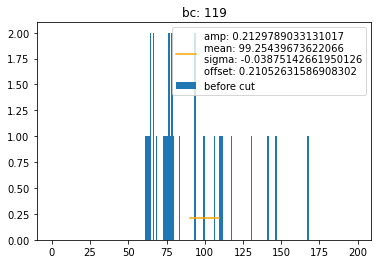

In [5]:
goodBC = []
for bc in range(127):
	results.resetCuts()
	results.defineCut('bc', bc)
	results.defineCut('energy', '>', 60)
	results.defineCut('t0', 'between', 3000, 4000)
	#results.defineCut('timestamp', 'between', 3000, 4000)
	if len(results.data())>10:
		results.hist('energy', bins = np.arange(0, 200), label='before cut', width=1)
		popt, pcov = results.fitHist('energy', bins = np.arange(90, 110), p0=[100, 100, 2, 0], color='orange')
		results.legend()
		plt.title('bc: '+str(bc))
		results.show()
		if popt[0] > 20:
			goodBC.append([bc, popt, pcov])

In [19]:
print(len(goodBC))

57


In [9]:
coldFilenames = []
coldFilenames.append('ScopeRun297_10.scope')
coldFilenames.append('ScopeRun297_11.scope')
coldFilenames.append('ScopeRun298_6.scope')
coldFilenames.append('ScopeRun298_11.scope')
coldFilenames.append('ScopeRun299_15.scope')
coldFilenames.append('ScopeRun300_24.scope')
coldFilenames.append('ScopeRun301_19.scope')
coldFilenames.append('ScopeRun302_9.scope')
coldFilenames.append('ScopeRun304_5.scope')
coldFilenames.append('ScopeRun304_13.scope')
coldFilenames.append('ScopeRun304_19.scope')
coldFilenames.append('ScopeRun305_3.scope')
coldFilenames.append('ScopeRun306_7.scope')
coldFilenames.append('ScopeRun306_16.scope')
coldFilenames.append('ScopeRun306_30.scope')
coldFilenames.append('ScopeRun306_43.scope')
coldFiles = []
for file in coldFilenames:
	coldFiles.append(fileDirectory+file)

In [10]:
coldWaveforms = Nab.wf.waveformFile(coldFiles)

In [18]:
print(coldWaveforms.numwaves)

523385


In [15]:
coldResults = coldWaveforms.determineEnergyTiming('trap', params=[1250, 40, 1250], batchsize=10000)

100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [04:53<00:00,  5.65s/it]


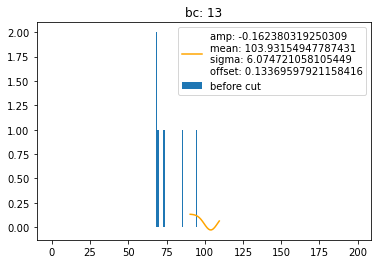

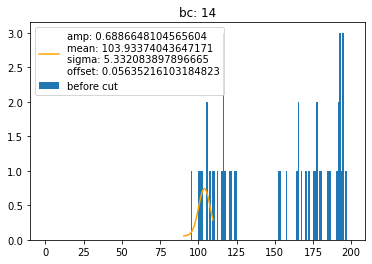

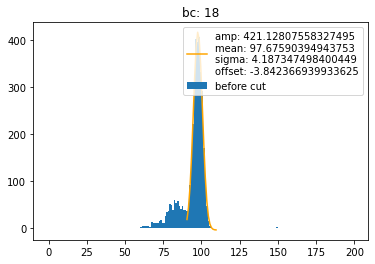

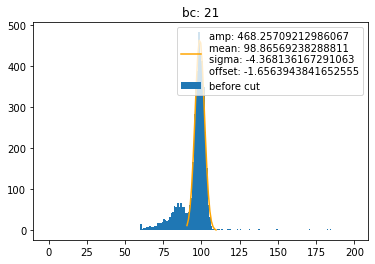

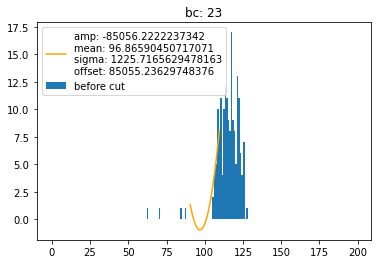

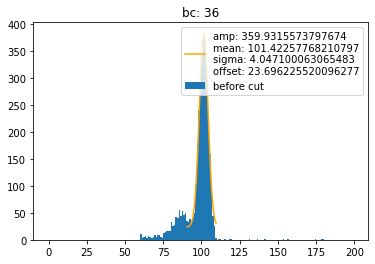

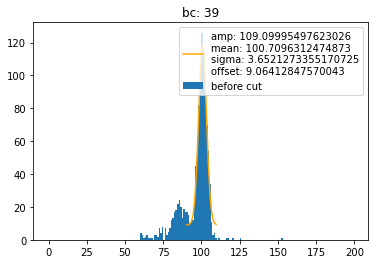

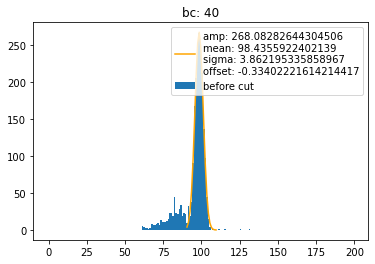

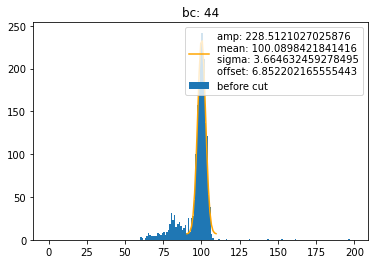

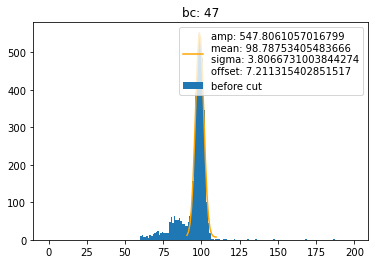

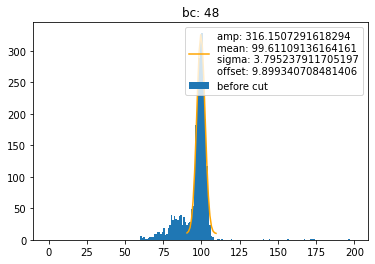

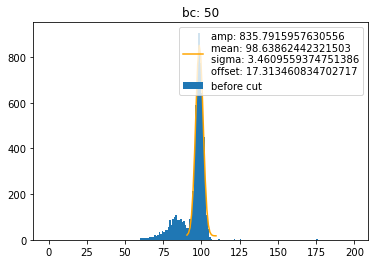

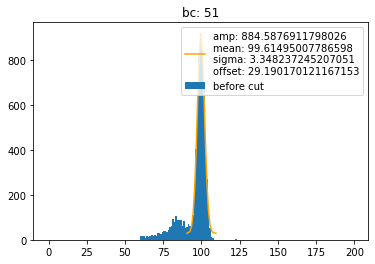

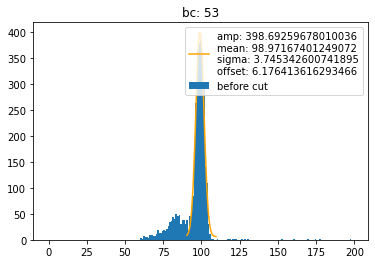

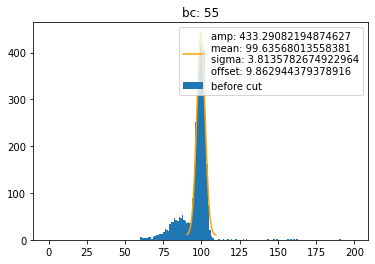

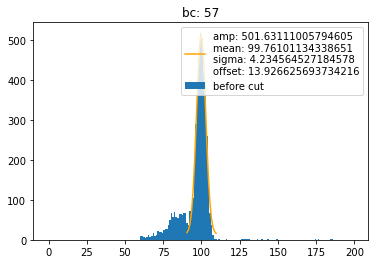

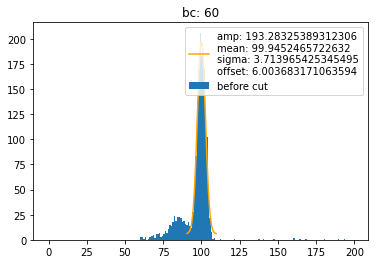

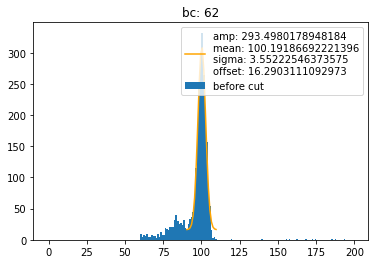

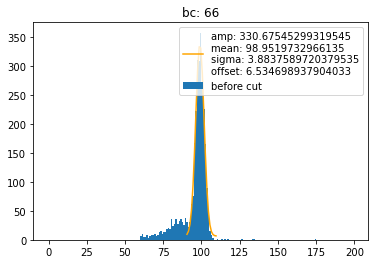

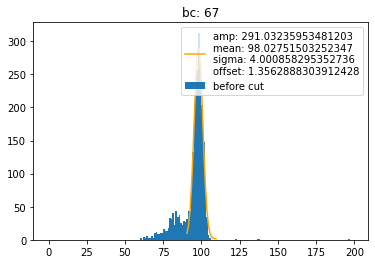

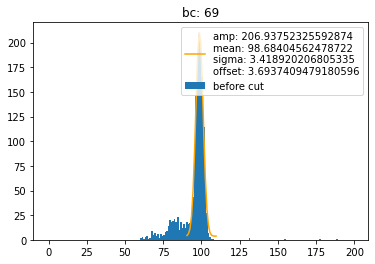

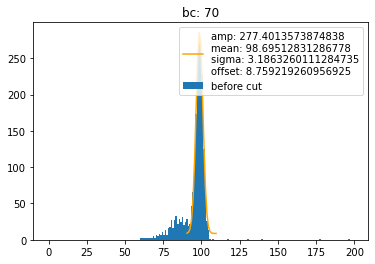

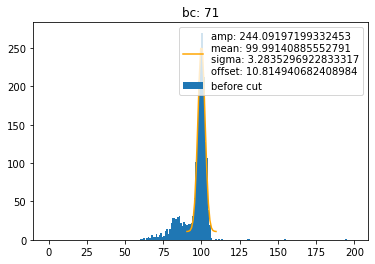

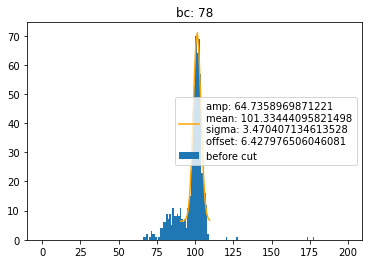

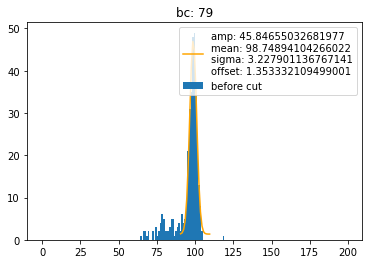

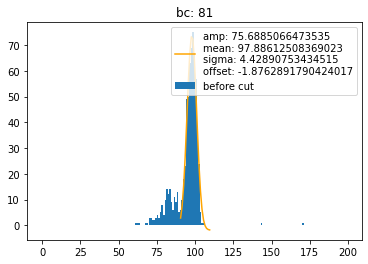

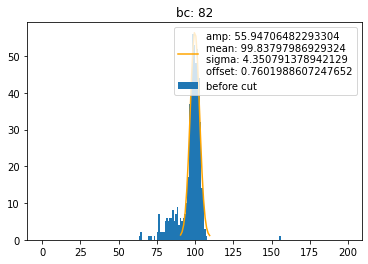

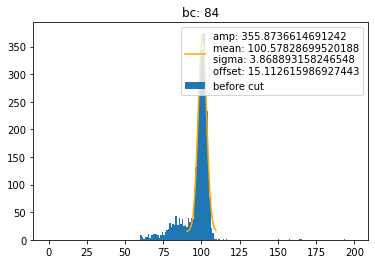

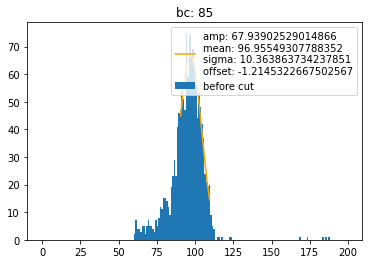

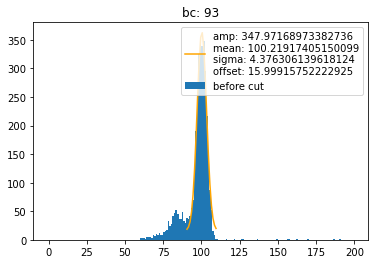

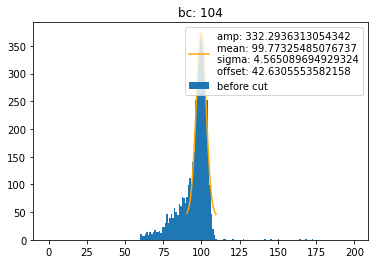

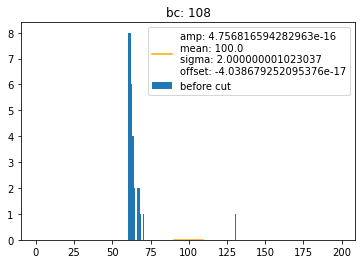

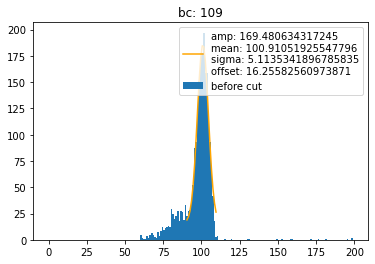

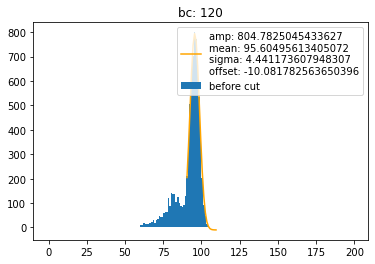

In [16]:
goodBCCold = []
for bc in range(127):
	coldResults.resetCuts()
	coldResults.defineCut('bc', bc)
	coldResults.defineCut('energy', '>', 60)
	coldResults.defineCut('t0', 'between', 3000, 4000)
	#results.defineCut('timestamp', 'between', 3000, 4000)
	if len(coldResults.data())>10:
		coldResults.hist('energy', bins = np.arange(0, 200), label='before cut', width=1)
		popt, pcov = coldResults.fitHist('energy', bins = np.arange(90, 110), p0=[100, 100, 2, 0], color='orange')
		coldResults.legend()
		plt.title('bc: '+str(bc))
		coldResults.show()
		if popt[0] > 20:
			goodBCCold.append([bc, popt, pcov])

In [28]:
print(len(goodBCCold))

30


In [22]:
mediumFilenames = []
mediumFilenames.append('ScopeRun346_3.scope')
mediumFilenames.append('ScopeRun346_7.scope')
mediumFilenames.append('ScopeRun353_5.scope')
mediumFilenames.append('ScopeRun353_6.scope')
mediumFilenames.append('ScopeRun354_3.scope')
mediumFiles = []
for file in mediumFilenames:
	mediumFiles.append(fileDirectory+file)

In [23]:
mediumWaveforms = Nab.wf.waveformFile(mediumFiles)

In [24]:
print(mediumWaveforms.numwaves)
mediumResults = mediumWaveforms.determineEnergyTiming('trap', params=[1250, 40, 1250], batchsize=10000)

  0%|                                                                                           | 0/28 [00:00<?, ?it/s]

281621


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [02:37<00:00,  5.63s/it]


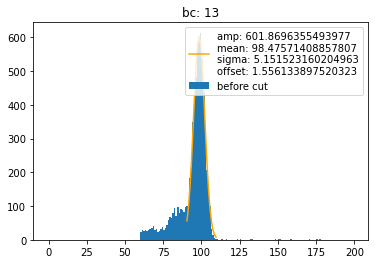

C:\Users\divad\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


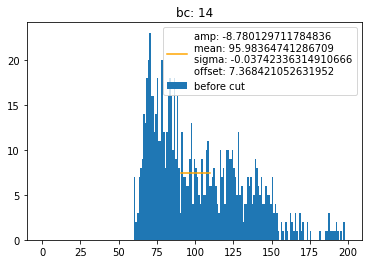

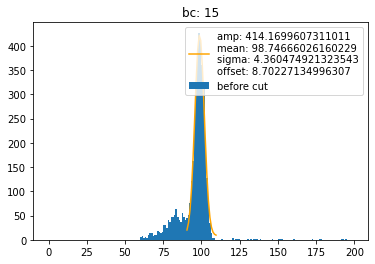

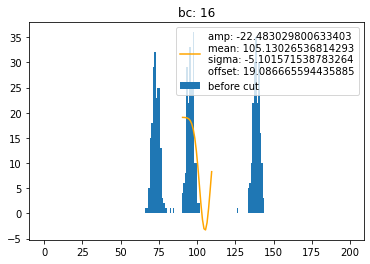

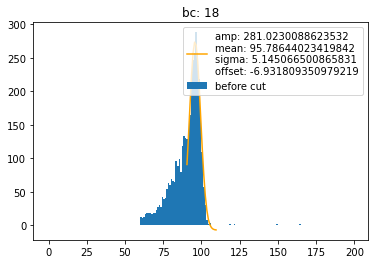

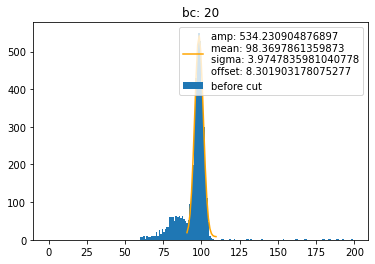

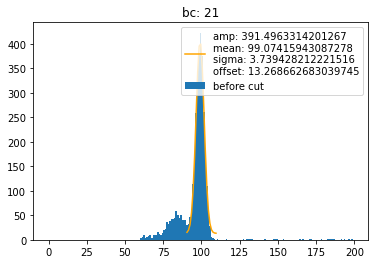

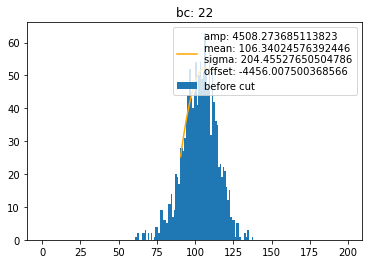

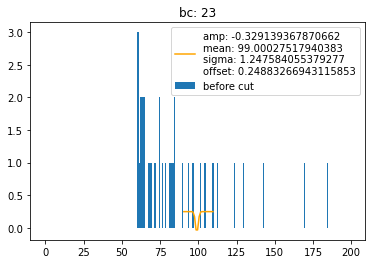

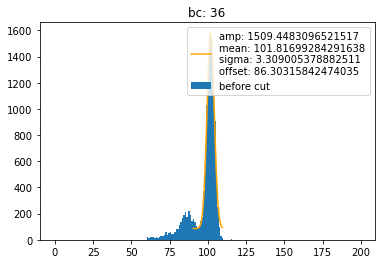

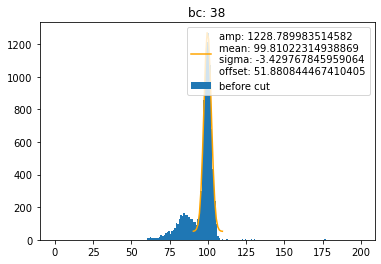

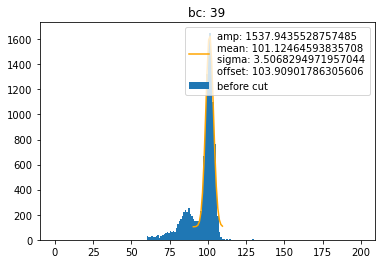

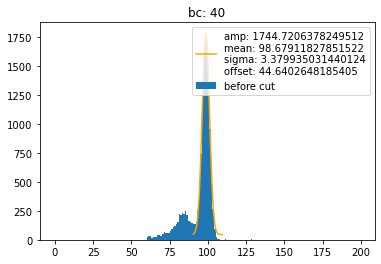

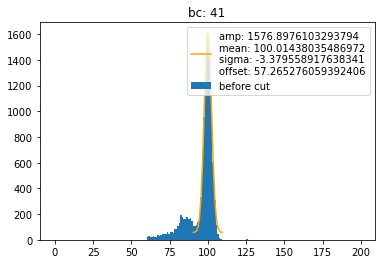

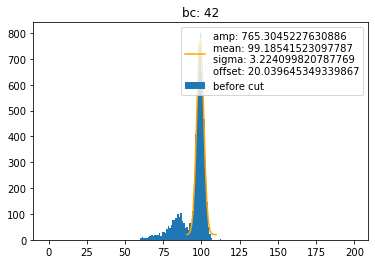

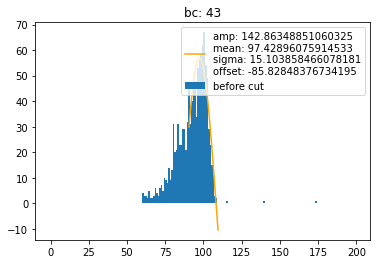

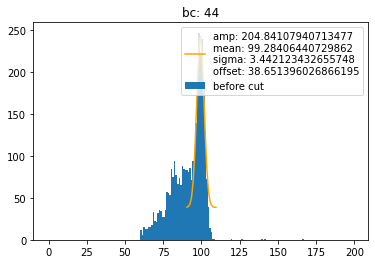

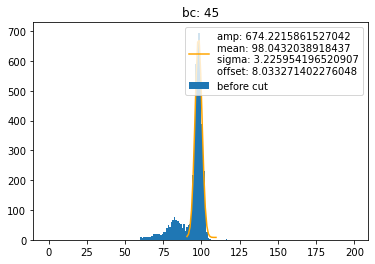

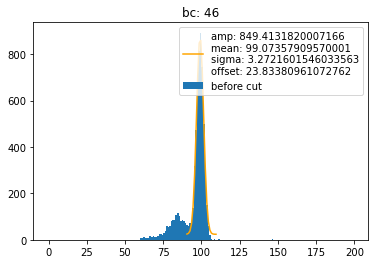

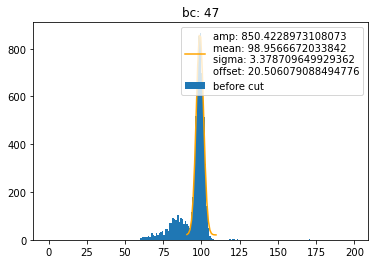

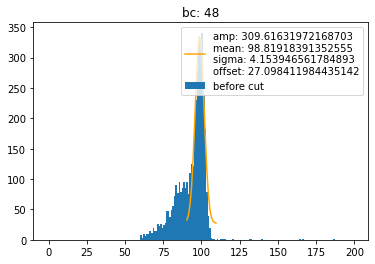

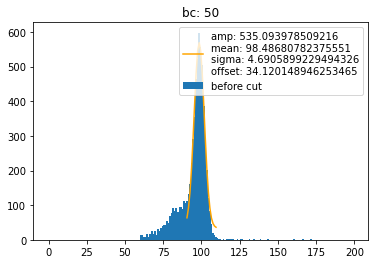

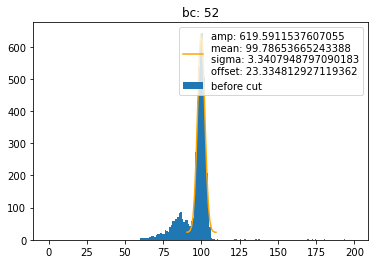

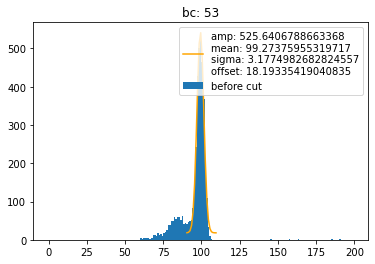

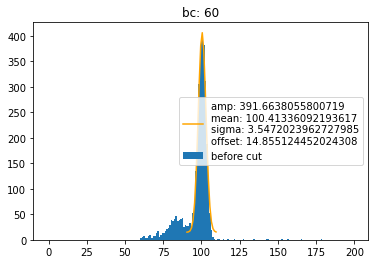

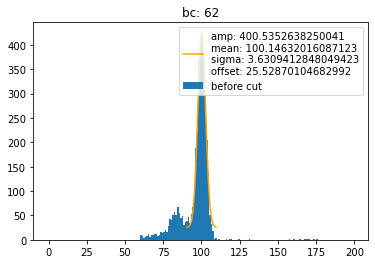

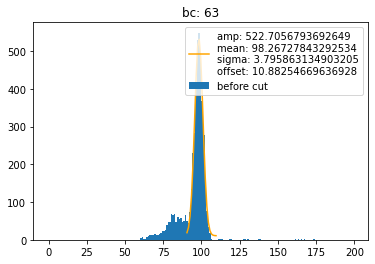

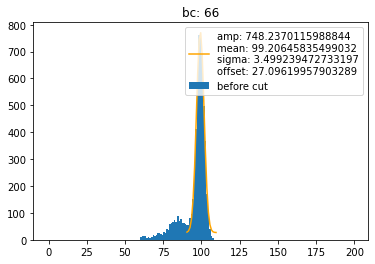

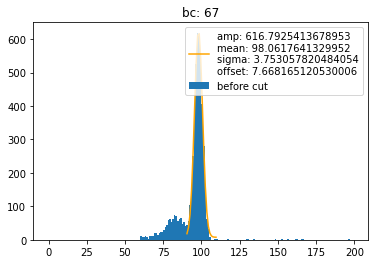

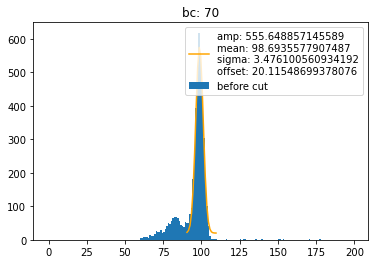

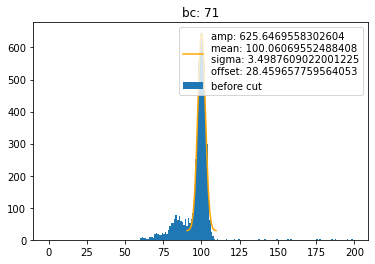

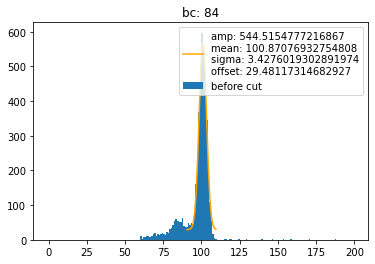

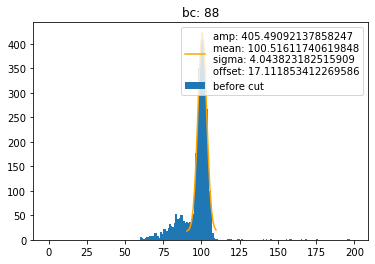

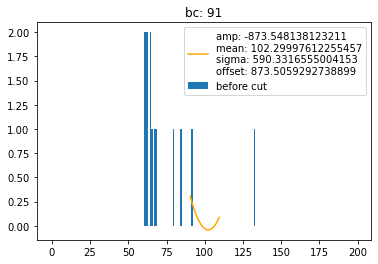

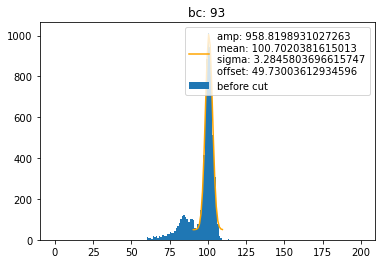

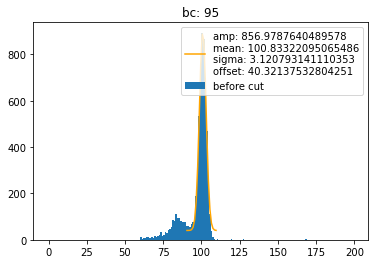

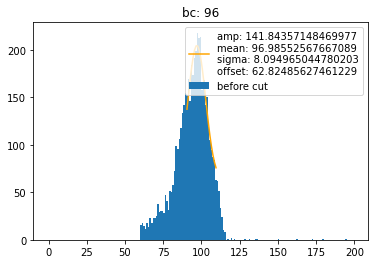

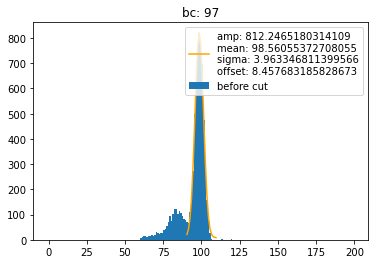

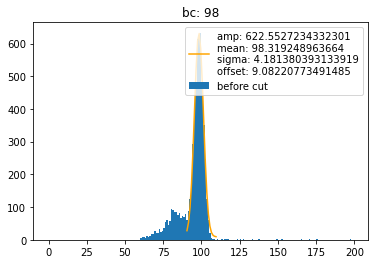

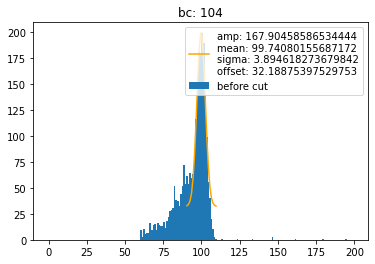

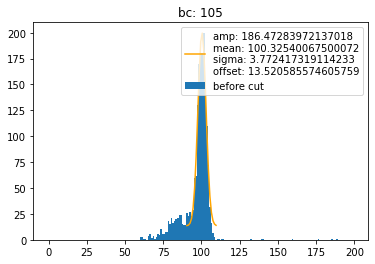

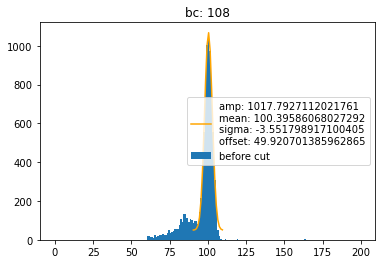

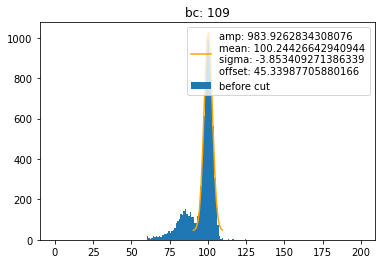

In [26]:
goodBCMedium = []
for bc in range(127):
	mediumResults.resetCuts()
	mediumResults.defineCut('bc', bc)
	mediumResults.defineCut('energy', '>', 60)
	mediumResults.defineCut('t0', 'between', 3000, 4000)
	#results.defineCut('timestamp', 'between', 3000, 4000)
	if len(mediumResults.data())>10:
		mediumResults.hist('energy', bins = np.arange(0, 200), label='before cut', width=1)
		popt, pcov = mediumResults.fitHist('energy', bins = np.arange(90, 110), p0=[100, 100, 2, 0], color='orange')
		mediumResults.legend()
		plt.title('bc: '+str(bc))
		mediumResults.show()
		if popt[0] > 20:
			goodBCMedium.append([bc, popt, pcov])

In [29]:
print(len(goodBCMedium))

39
